# 1 导入基本工具包
导入数据分析的基本工具包，numpy、pandas、scipy；可视化工具包，matplotlib、seaborn、missingno，missingno是一个查看数据集缺失状况的可视化工具包。

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('seaborn-notebook')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1.1 读取数据

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
print('There are {} train samples and {} test samples'.format(len(train),len(test)))
print('The train set shape: {}'.format(train.shape))

There are 1460 train samples and 1459 test samples
The train set shape: (1460, 81)


预览train和test数据集

In [3]:
display(train.head(5).transpose())

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [4]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

None

train数据集包含1460条销售房屋数据样本，每条样本有81条关于房屋的特征，有数值型、字符型的特征，其中就包含此次建模的预测特征SalePrice。我们的目的就是通过挖掘房屋的特征关系，构建一个能够很好预测房屋售价SalePrice的模型。

#### 将train和test合并处理
Id列是每条样本的独立标识，对于预测并没有实际意义

In [5]:
train_ID = train['Id']
test_ID = test['Id']
train_y = train['SalePrice']
train = train.drop('Id',axis=1)
test = test.drop('Id',axis=1)
all_data = pd.concat([train,test],axis=0).reset_index(drop=True)
display(all_data.shape)

(2919, 80)

In [6]:
print(all_data.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

# 2 数据初步探索

## 2.1 目标变量：SalePrice
我们先观察一下目标预测变量SalePrice的分布情况

In [7]:
mu, sigma = norm.fit(train['SalePrice'])
print("mu = {:.2f} and sigma = {:.2f}".format(mu,sigma))
print(train['SalePrice'].describe())

mu = 180921.20 and sigma = 79415.29
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


SalePrice的数据分布范围较广，最小为34900，最大为755000，均值为34900，中位数163000。从目前来看，数据分布呈现左倾，有端长尾。

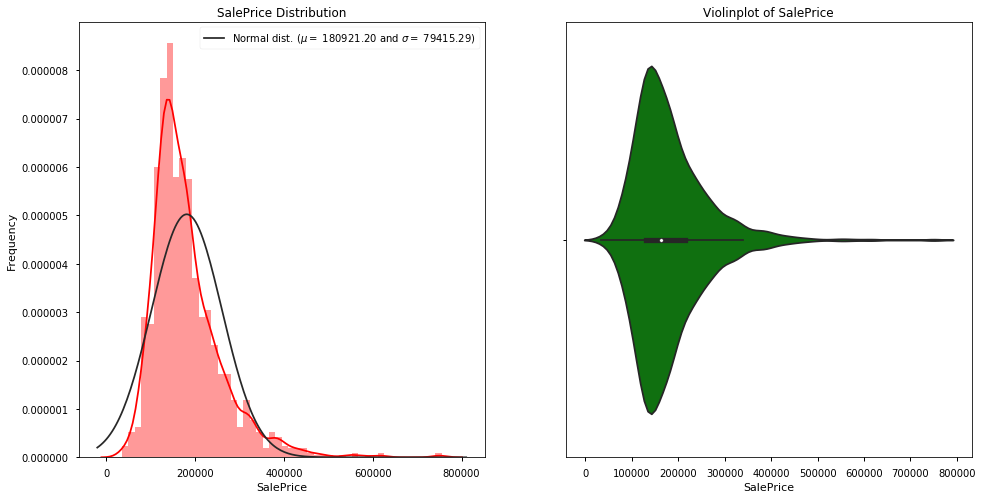

In [8]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.distplot(train['SalePrice'],bins=50,fit=norm,color='red')
plt.legend(['Normal dist. ($\mu =$ {:.2f} and $\sigma =$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')
plt.subplot(122)
sns.violinplot(train['SalePrice'],color='g')
plt.title('Violinplot of SalePrice')
plt.show()

从SalePrice的分布状况来看，存在一定程度的左倾，后续可以考虑对SalePrice变量进行对数变换，减少左倾分布状况对建模带来的影响。

## 2.2 最重要的数值特征

In [9]:
numericVarNames = all_data.columns[all_data.dtypes != 'object']
print("There are {} numeric Variables, they are:\n{}".format(len(numericVarNames),numericVarNames))
numericVars = all_data[numericVarNames]

There are 37 numeric Variables, they are:
Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')


#### 观察各个数值变量之间的相关系数
* 计算数值变量之间的相关系数矩阵
* 将系数矩阵按照SalePrice列的值从大到小降序排序
* 绘制降序排序的heatmap图

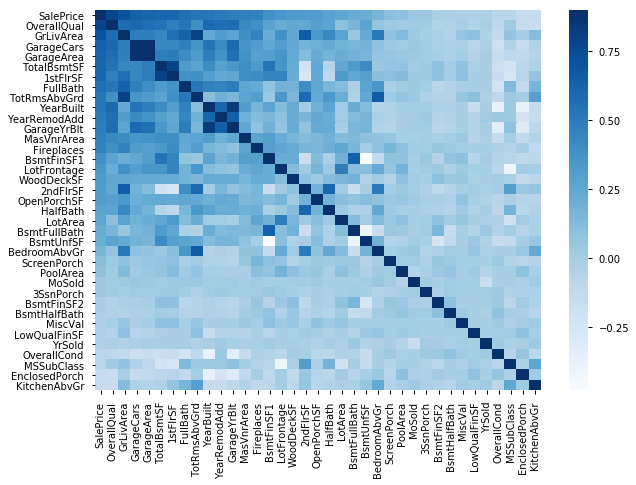

In [17]:
cor_numVar = numericVars.corr()
sort_index =  cor_numVar.sort_values('SalePrice',ascending=False).index
plt.figure(figsize=(10,7))
sns.heatmap(cor_numVar.loc[sort_index,sort_index],vmax=0.9,cbar=True,annot=False,cmap=plt.cm.Blues)
plt.show()

从上图了解到，与目标预测变量SalePrice最相关的数值变量有OverallQual（房屋整体材料质量评分）、GrLivArea（地面以上面积）、GarageCars（车库容量）、GarageArea（车库面积）等。下面，我们着重看一下与SalePrice相关系数大于0.5的那些数值变量。

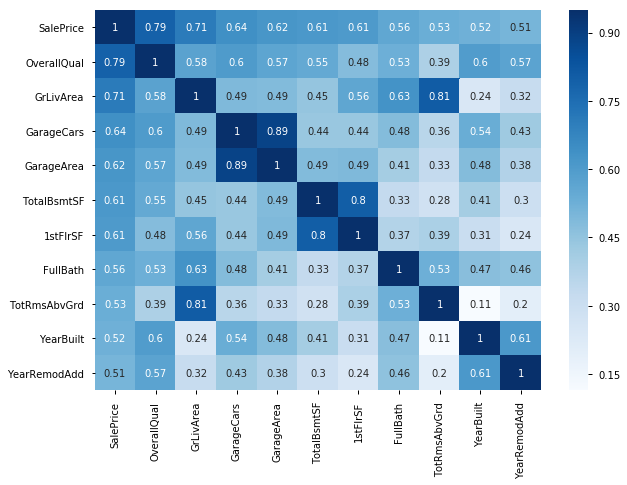

In [19]:
corHightVars = cor_numVar[cor_numVar['SalePrice']>0.5].sort_values('SalePrice',ascending=False).index
corHight = cor_numVar.loc[corHightVars,corHightVars]

plt.figure(figsize=(10,7))
sns.heatmap(data=corHight,vmax=0.95,cbar=True,annot=True,cmap=plt.cm.Blues)
plt.show()

### 2.2.1 Overall Quality vs. SalePrice

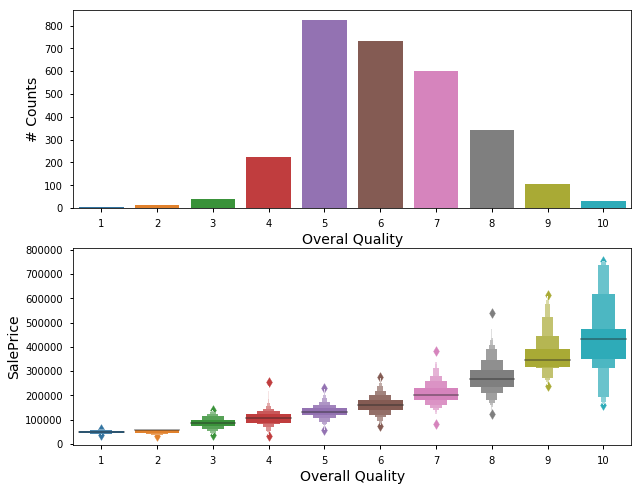

In [35]:
plt.figure(figsize=(10,8))
plt.subplot(211)
OverallQualCount = all_data['OverallQual'].value_counts().sort_index(ascending=True)
sns.barplot(OverallQualCount.index,OverallQualCount.values)
plt.xlabel('Overal Quality',fontsize=14)
plt.ylabel('# Counts',fontsize=14)

plt.subplot(212)
sns.boxenplot(data=train,x='OverallQual',y='SalePrice')
plt.xlabel('Overall Quality',fontsize=14)
plt.ylabel('SalePrice',fontsize=14)
plt.show()

从上图可知，房屋整体质量评分OverallQual的分布并不均衡，质量中等的房屋居多。

房屋售价随着房屋整体质量的提高而增大，这个趋势是非常明显的。另外，我们也发现，房屋质量评分越高的那类，整体方差也是比较高的，尤其评分为10。

### 2.2.2 Above Grade (Ground) Living Area(GrLivArea) vs. SalePrice

<Figure size 720x432 with 0 Axes>

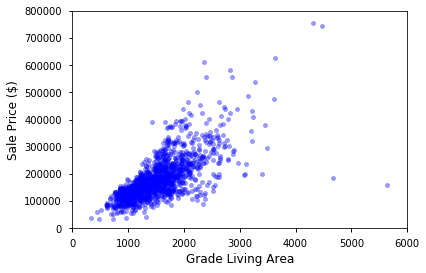

In [42]:
plt.figure(figsize=(10,6))
train.plot(kind='scatter',x='GrLivArea',y='SalePrice',color='blue',facecolor='black',alpha=0.4)
plt.xlabel('Grade Living Area',fontsize=12)
plt.ylabel('Sale Price ($)',fontsize=12)
plt.axis([0,6000,0,800000])

plt.show()

我们观察到两个非常明显的异常点，房屋的总体售价与地上居住面积的总体趋势不符。

In [53]:
train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].transpose()

,523,1298
MSSubClass,60,60
MSZoning,RL,RL
LotFrontage,130,313
LotArea,40094,63887
Street,Pave,Pave
Alley,NaN,NaN
LotShape,IR1,IR3
LandContour,Bnk,Bnk
Utilities,AllPub,AllPub
LotConfig,Inside,Corner


# 3 Missing data

In [54]:
MissingCounts = all_data.apply(lambda x: x.isnull().sum())
MissingRatios = all_data.apply(lambda x: x.isnull().sum()/len(x))
Missing = pd.DataFrame(data = {'Missing Counts':MissingCounts,'Missing Ratios':MissingRatios},
                       index = MissingCounts.index)

In [55]:
display(Missing[Missing['Missing Counts']>0].sort_values('Missing Counts',ascending=False))

,Missing Counts,Missing Ratios
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471


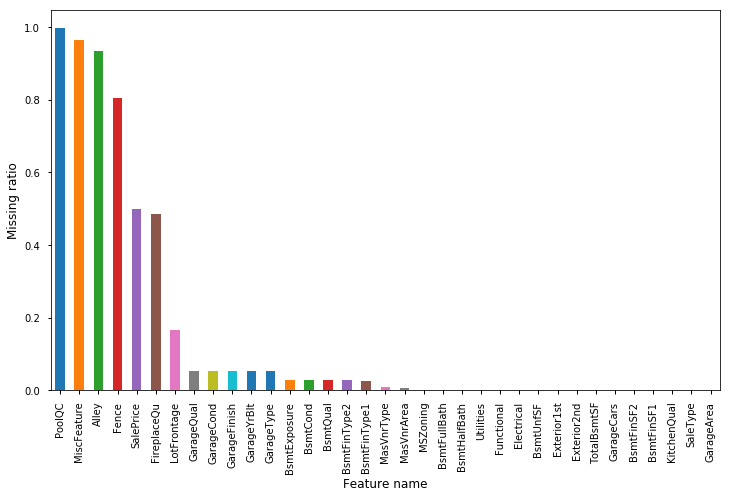

In [57]:
plt.figure(figsize=(12,7))
Missing[Missing['Missing Ratios']>0]['Missing Ratios'].sort_values(ascending=False).plot(kind='bar',y='Missing Ratios')
plt.xlabel('Feature name',fontsize=12)
plt.ylabel('Missing ratio',fontsize=12)
plt.show()

## 3.1 填补缺失值

### 3.1.1 Pool相关特征

PoolQC是缺失比例最高的特征，关于PoolQC特征的描述如下：

- PoolQC: Pool quality

* Ex Excellent
* Gd Good
* TA Average/Typical
* Fa Fair
* NA No Pool

因此，数据缺失代表的是该房屋没有Pool，这里我们用'none'字段来进行缺失值填补。

In [120]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

In [121]:
display(all_data['PoolQC'].value_counts())

None    2909
Gd         4
Ex         4
Fa         2
Name: PoolQC, dtype: int64

缺失值填补完之后，我们来检查一下PoolQC数据的情况。房屋如果PoolArea大于0，那么PoolQC就不应该是None。

In [123]:
display(all_data[(all_data['PoolArea']>0)&(all_data['PoolQC']=='None')][['PoolArea','PoolQC','OverallQual']])

,PoolArea,PoolQC,OverallQual
2420,368,None,4
2503,444,None,6
2599,561,None,3


我们发现，还是有3例样本的数据存在问题，我们大概能判断，PoolArea填错的可能性比遗漏PoolQC的可能性要小的多。因此，我们考虑用PoolArea的值来推测PoolQC的值。

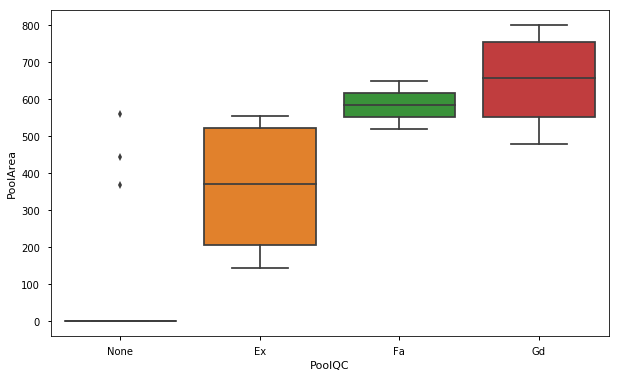

In [125]:
plt.figure(figsize=(10,6))
sns.boxplot(data=all_data,x='PoolQC',y='PoolArea')
plt.show()

从Boxplot图中结果推测，PoolArea值为368和444的两个房屋，很可能PoolQC的类为**Ex**，PoolArea值为561的房屋，PoolQC的类为**Fa**。

In [126]:
all_data.loc[[2420,2503],'PoolQC'] = 'Ex'
all_data.loc[2599,'PoolQC'] = 'Fa'

### 3.1.2 